<a href="https://colab.research.google.com/github/khanhdang/Colab-ImageProcessing/blob/master/5_4__face_detect_haarcascade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
version = cv2.__version__

See xml file (trained)


```
https://github.com/opencv/opencv/tree/master/data/haarcascades
```



In [0]:
!wget https://docs.opencv.org/$version/haarcascade_frontalface_default.xml
!wget https://docs.opencv.org/$version/haarcascade_eye.xml

--2019-03-14 01:37:03--  https://docs.opencv.org/3.4.3/haarcascade_frontalface_default.xml
Resolving docs.opencv.org (docs.opencv.org)... 207.38.86.214, 2605:de00:1:1:4a:39:0:7
Connecting to docs.opencv.org (docs.opencv.org)|207.38.86.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [application/xml]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  5.15MB/s    in 0.2s    

2019-03-14 01:37:03 (5.15 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2019-03-14 01:37:08--  https://docs.opencv.org/3.4.3/haarcascade_eye.xml
Resolving docs.opencv.org (docs.opencv.org)... 207.38.86.214, 2605:de00:1:1:4a:39:0:7
Connecting to docs.opencv.org (docs.opencv.org)|207.38.86.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (333K) [application/xml]
Saving to: ‘haarcascade_eye.xml’

haarcascade_eye.xml 100%[===================>] 333.40K  --.-KB/s  

In [0]:
!rm *.jpg
!wget https://images.pexels.com/photos/614810/pexels-photo-614810.jpeg photo.jpg
from google.colab import files
# file=files.upload()
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

rm: cannot remove '*.jpg': No such file or directory
--2019-03-20 01:53:17--  https://images.pexels.com/photos/614810/pexels-photo-614810.jpeg
Resolving images.pexels.com (images.pexels.com)... 104.17.209.102, 104.17.208.102, 2606:4700::6811:d166, ...
Connecting to images.pexels.com (images.pexels.com)|104.17.209.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5430867 (5.2M) [image/jpeg]
Saving to: ‘pexels-photo-614810.jpeg’

pexels-photo-614810 100%[===================>]   5.18M  9.45MB/s    in 0.5s    

2019-03-20 01:53:18 (9.45 MB/s) - ‘pexels-photo-614810.jpeg’ saved [5430867/5430867]

--2019-03-20 01:53:18--  http://photo.jpg/
Resolving photo.jpg (photo.jpg)... failed: Name or service not known.
wget: unable to resolve host address ‘photo.jpg’
FINISHED --2019-03-20 01:53:18--
Total wall clock time: 0.8s
Downloaded: 1 files, 5.2M in 0.5s (9.45 MB/s)


NameError: ignored

In [0]:

img = cv2.imread('photo.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

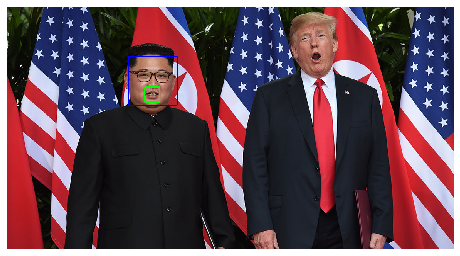

In [0]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  eyes = eye_cascade.detectMultiScale(roi_gray)
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.grid(None)   
plt.xticks([])
plt.yticks([])
imgplot = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [0]:
cv2.imwrite('output.png',img)
files.download('output.png')